In [122]:
# Preprocessing
import numpy as np
import pandas as pd

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import os
import scipy as stats

# To remove outliers
from scipy.stats import zscore

# Evaluation Metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn import metrics

# ML Algorithms
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [54]:
# importing dataset and soring in df_train. 

df_train = pd.read_excel('Data_Train.xlsx')

df_train

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [4]:
df_train['Duration'].value_counts()

2h 50m     550
1h 30m     386
2h 45m     337
2h 55m     337
2h 35m     329
          ... 
31h 30m      1
30h 25m      1
42h 5m       1
4h 10m       1
47h 40m      1
Name: Duration, Length: 368, dtype: int64

In [5]:
df_train.dropna(inplace = True)

In [6]:
df_train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

# Exploratory Data Analysis

In [7]:
df_train['Journey_day'] = pd.to_datetime(df_train.Date_of_Journey, format = "%d/%m/%Y").dt.day

df_train['Journey_month'] = pd.to_datetime(df_train['Date_of_Journey'], format = "%d/%m/%Y").dt.month

In [8]:
df_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [9]:
# As the column 'Date_of_Journey' is only date related, hence we can drop it from the dataset.

df_train.drop('Date_of_Journey', axis = 1, inplace = True)

In [10]:
# Departure time is when a plane leaves the airport.
# Just like Date_of_Journey we can extract values from Dep_Time as well.

# Extracting Hours
df_train['Dep_hour'] = pd.to_datetime(df_train['Dep_Time']).dt.hour

# Extracting Minutes
df_train['Dep_min'] = pd.to_datetime(df_train['Dep_Time']).dt.minute

# Now we can drop Dep_Time as it is of no use
df_train.drop(['Dep_Time'], axis = 1, inplace = True)

In [11]:
df_train.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


In [12]:
# Arrival time is when the plane reaches the gate.

# like Date_of_Journey we can extract values from Arrival_Time

# Extracting Hours
df_train['Arrival_hour'] = pd.to_datetime(df_train.Arrival_Time).dt.hour

# Extracting Minutes
df_train['Arrival_min'] = pd.to_datetime(df_train.Arrival_Time).dt.minute

# Now we can drop Arrival_Time as it is of no use
df_train.drop(['Arrival_Time'], axis = 1, inplace = True)

In [13]:
df_train.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [14]:
# Time taken by flight to reach destination is called Duration

# It is the differnce between Departure Time and Arrival time


# Assigning and converting Duration column into list
duration = list(df_train['Duration'])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   

In [15]:
# duration_hours and duration_mins list to df_train dataframe

df_train["Duration_hours"] = duration_hours
df_train["Duration_mins"] = duration_mins

In [16]:
df_train.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35,4,45


# Lets work on catagorical data

In [17]:
df_train["Airline"].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

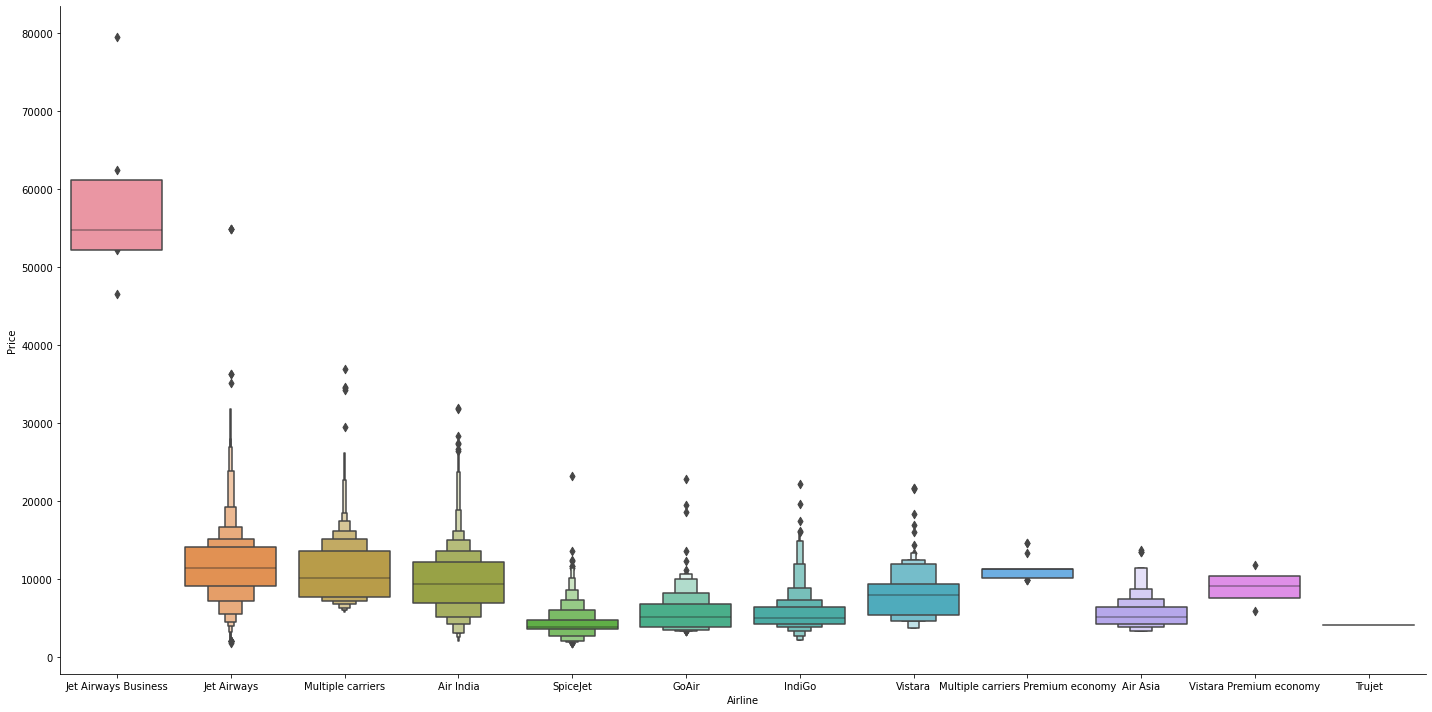

In [18]:
# Lets plot Airlines V/S Price

sns.catplot(y = 'Price', x = 'Airline', data = df_train.sort_values('Price', ascending = False), kind = 'boxen', height = 10, aspect = 2)

plt.show()

In [19]:
# Airline has Nominal Categorical data, we will use OneHotEncoder

Airline = df_train[['Airline']]

Airline = pd.get_dummies(Airline, drop_first = True)

Airline

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
10678,0,0,0,0,0,0,0,0,0,0,0
10679,1,0,0,0,0,0,0,0,0,0,0
10680,0,0,0,1,0,0,0,0,0,0,0
10681,0,0,0,0,0,0,0,0,0,1,0


In [20]:
df_train['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

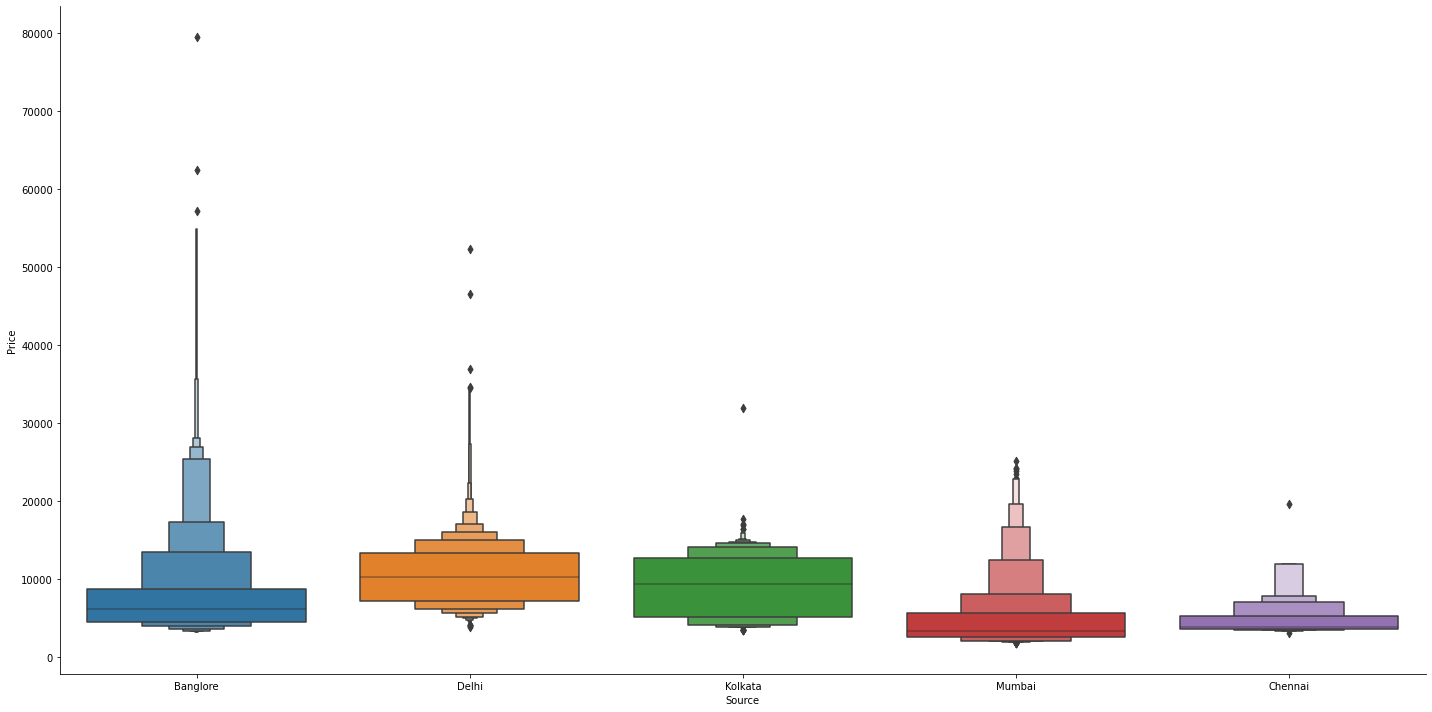

In [21]:
# Compare Source and Price

sns.catplot(y = "Price", x= "Source", data = df_train.sort_values('Price', ascending = False), kind = 'boxen', height = 10, aspect = 2)

In [22]:
# As source is Nominal categorical data, we will use OneHotEncoding 

Source = df_train[['Source']]

Source = pd.get_dummies(Source, drop_first = True)

Source

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0
...,...,...,...,...
10678,0,0,1,0
10679,0,0,1,0
10680,0,0,0,0
10681,0,0,0,0


In [23]:
df_train['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [24]:
# Destination is Nominal categorical data, we will use OneHotEncoding 

Destination = df_train[['Destination']]

Destination = pd.get_dummies(Destination, drop_first = True)

Destination

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1
...,...,...,...,...,...
10678,0,0,0,0,0
10679,0,0,0,0,0
10680,0,1,0,0,0
10681,0,0,0,0,1


In [25]:
df_train['Route']

0                    BLR → DEL
1        CCU → IXR → BBI → BLR
2        DEL → LKO → BOM → COK
3              CCU → NAG → BLR
4              BLR → NAG → DEL
                 ...          
10678                CCU → BLR
10679                CCU → BLR
10680                BLR → DEL
10681                BLR → DEL
10682    DEL → GOI → BOM → COK
Name: Route, Length: 10682, dtype: object

In [26]:
# Additional_info has almost no info available in it. Also Route & TOtal_stops are relational.
# Lets drop the columns Additional_Info & Route.
df_train.drop(['Route', 'Additional_Info'], axis = 1, inplace = True)

In [27]:
df_train['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [28]:
# Lets replace Total_stops in to numerical data by label encoding.

df_train.replace({'non-stop' : 0, '1 stop' : 1, '2 stops' : 2, '3 stops' : 3, '4 stops' : 4}, inplace = True)

df_train

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,2h 50m,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,7h 25m,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,19h,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,5h 25m,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,4h 45m,1,13302,1,3,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,2h 30m,0,4107,9,4,19,55,22,25,2,30
10679,Air India,Kolkata,Banglore,2h 35m,0,4145,27,4,20,45,23,20,2,35
10680,Jet Airways,Banglore,Delhi,3h,0,7229,27,4,8,20,11,20,3,0
10681,Vistara,Banglore,New Delhi,2h 40m,0,12648,1,3,11,30,14,10,2,40


In [29]:
# Lets Link dataframe that consist of train_data, Airline, Source and Destination

data_train = pd.concat([df_train, Airline, Source, Destination], axis = 1)

data_train

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,2h 50m,0,3897,24,3,22,20,...,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,7h 25m,2,7662,1,5,5,50,...,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,19h,2,13882,9,6,9,25,...,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,5h 25m,1,6218,12,5,18,5,...,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,4h 45m,1,13302,1,3,16,50,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,2h 30m,0,4107,9,4,19,55,...,0,0,0,1,0,0,0,0,0,0
10679,Air India,Kolkata,Banglore,2h 35m,0,4145,27,4,20,45,...,0,0,0,1,0,0,0,0,0,0
10680,Jet Airways,Banglore,Delhi,3h,0,7229,27,4,8,20,...,0,0,0,0,0,0,1,0,0,0
10681,Vistara,Banglore,New Delhi,2h 40m,0,12648,1,3,11,30,...,0,0,0,0,0,0,0,0,0,1


In [30]:
# Lets drop Airline, Source and Destination.

data_train.drop(["Airline","Source", "Destination"], axis = 1, inplace = True)

data_train

,Duration,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,2h 50m,0,3897,24,3,22,20,1,10,2,...,0,0,0,0,0,0,0,0,0,1
1,7h 25m,2,7662,1,5,5,50,13,15,7,...,0,0,0,1,0,0,0,0,0,0
2,19h,2,13882,9,6,9,25,4,25,19,...,0,0,1,0,0,1,0,0,0,0
3,5h 25m,1,6218,12,5,18,5,23,30,5,...,0,0,0,1,0,0,0,0,0,0
4,4h 45m,1,13302,1,3,16,50,21,35,4,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,2h 30m,0,4107,9,4,19,55,22,25,2,...,0,0,0,1,0,0,0,0,0,0
10679,2h 35m,0,4145,27,4,20,45,23,20,2,...,0,0,0,1,0,0,0,0,0,0
10680,3h,0,7229,27,4,8,20,11,20,3,...,0,0,0,0,0,0,1,0,0,0
10681,2h 40m,0,12648,1,3,11,30,14,10,2,...,0,0,0,0,0,0,0,0,0,1


In [31]:
data_train.shape

(10682, 31)

# TEST DATASET

In [90]:
df_test = pd.read_excel('Test_set.xlsx')

df_test

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info


In [91]:
# Preprocessing

print("Test data Info")
print("------")
print(df_test.info())

print("Null values :")
print("------")
df_test.dropna(inplace = True)
print(df_test.isnull().sum())

Test data Info
------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB
None
Null values :
------
Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64


# Exploratory Data Analysis  test dataset

In [92]:
# Date_of_Journey

df_test["Journey_day"] = pd.to_datetime(df_test.Date_of_Journey, format = "%d/%m/%Y").dt.day

df_test["Journey_month"] = pd.to_datetime(df_test["Date_of_Journey"], format = "%d/%m/%Y").dt.month

df_test.drop(["Date_of_Journey"], axis = 1, inplace = True)

# Dep_Time

df_test["Dep_hour"] = pd.to_datetime(df_test["Dep_Time"]).dt.hour

df_test["Dep_min"] = pd.to_datetime(df_test["Dep_Time"]).dt.minute

df_test.drop(["Dep_Time"], axis = 1, inplace = True)

# Arrival_Time

df_test["Arrival_hour"] = pd.to_datetime(df_test.Arrival_Time).dt.hour

df_test["Arrival_min"] = pd.to_datetime(df_test.Arrival_Time).dt.minute

df_test.drop(["Arrival_Time"], axis = 1, inplace = True)

In [93]:
# Duration
duration = list(df_test["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []

duration_mins = []

for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))

# Adding Duration column to test set

df_test["Duration_hours"] = duration_hours

df_test["Duration_mins"] = duration_mins

df_test.drop(["Duration"], axis = 1, inplace = True)

In [94]:
# Categorical data

print("Airline")

print("--------")

print(df_test["Airline"].value_counts())

Airline = pd.get_dummies(df_test["Airline"], drop_first = True)

print()

print("Source")

print("--------")

print(df_test["Source"].value_counts())

Source = pd.get_dummies(df_test["Source"], drop_first = True)

print()

print("Destination")

print("--------")

print(df_test["Destination"].value_counts())


Airline
--------
Jet Airways                          897
IndiGo                               511
Air India                            440
Multiple carriers                    347
SpiceJet                             208
Vistara                              129
Air Asia                              86
GoAir                                 46
Multiple carriers Premium economy      3
Vistara Premium economy                2
Jet Airways Business                   2
Name: Airline, dtype: int64

Source
--------
Delhi       1145
Kolkata      710
Banglore     555
Mumbai       186
Chennai       75
Name: Source, dtype: int64

Destination
--------
Cochin       1145
Banglore      710
Delhi         317
New Delhi     238
Hyderabad     186
Kolkata        75
Name: Destination, dtype: int64


In [95]:
# Replacing Total_Stops

df_test.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

# Link dataframe test_data + Airline + Source + Destination

data_test = pd.concat([df_test, Airline, Source, Destination], axis = 1)

data_test.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

print(df_test)

                Airline    Source Destination            Route  Total_Stops  \
0           Jet Airways     Delhi      Cochin  DEL → BOM → COK            1   
1                IndiGo   Kolkata    Banglore  CCU → MAA → BLR            1   
2           Jet Airways     Delhi      Cochin  DEL → BOM → COK            1   
3     Multiple carriers     Delhi      Cochin  DEL → BOM → COK            1   
4              Air Asia  Banglore       Delhi        BLR → DEL            0   
...                 ...       ...         ...              ...          ...   
2666          Air India   Kolkata    Banglore  CCU → DEL → BLR            1   
2667             IndiGo   Kolkata    Banglore        CCU → BLR            0   
2668        Jet Airways     Delhi      Cochin  DEL → BOM → COK            1   
2669          Air India     Delhi      Cochin  DEL → BOM → COK            1   
2670  Multiple carriers     Delhi      Cochin  DEL → BOM → COK            1   

                  Additional_Info  Journey_day  Jou

In [96]:
data_test.head()

,Route,Total_Stops,Additional_Info,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,DEL → BOM → COK,1.0,No info,6.0,6.0,17.0,30.0,4.0,25.0,10.0,...,0.0,0.0,1.0,0.0,0.0,0,0,0,0,1
1,CCU → MAA → BLR,1.0,No info,12.0,5.0,6.0,20.0,10.0,20.0,4.0,...,0.0,0.0,0.0,1.0,0.0,0,0,0,0,0
2,DEL → BOM → COK,1.0,In-flight meal not included,21.0,5.0,19.0,15.0,19.0,0.0,23.0,...,0.0,0.0,1.0,0.0,0.0,1,0,0,0,0
3,DEL → BOM → COK,1.0,No info,21.0,5.0,8.0,0.0,21.0,0.0,13.0,...,0.0,0.0,1.0,0.0,0.0,0,0,0,0,0
4,BLR → DEL,0.0,No info,24.0,6.0,23.0,55.0,2.0,45.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1


# Feature Selection
Finding corelation with target variable. Following are some of the feature selection methods

# heatmap
# feature_importance
# SelectKBest

In [97]:
data_train.shape

(10682, 31)

In [98]:
data_train.columns

Index(['Duration', 'Total_Stops', 'Price', 'Journey_day', 'Journey_month',
       'Dep_hour', 'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [99]:
X = data_train.loc[:, ['Total_Stops','Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi']]

X

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,24,3,22,20,1,10,2,50,0,...,0,0,0,0,0,0,0,0,0,1
1,2,1,5,5,50,13,15,7,25,1,...,0,0,0,1,0,0,0,0,0,0
2,2,9,6,9,25,4,25,19,0,0,...,0,0,1,0,0,1,0,0,0,0
3,1,12,5,18,5,23,30,5,25,0,...,0,0,0,1,0,0,0,0,0,0
4,1,1,3,16,50,21,35,4,45,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,9,4,19,55,22,25,2,30,0,...,0,0,0,1,0,0,0,0,0,0
10679,0,27,4,20,45,23,20,2,35,1,...,0,0,0,1,0,0,0,0,0,0
10680,0,27,4,8,20,11,20,3,0,0,...,0,0,0,0,0,0,1,0,0,0
10681,0,1,3,11,30,14,10,2,40,0,...,0,0,0,0,0,0,0,0,0,1


In [102]:
y = data_train.iloc[:,2]
y

0         3897
1         7662
2        13882
3         6218
4        13302
         ...  
10678     4107
10679     4145
10680     7229
10681    12648
10682    11753
Name: Price, Length: 10682, dtype: int64

In [82]:
y = data_train.iloc[:,2]
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

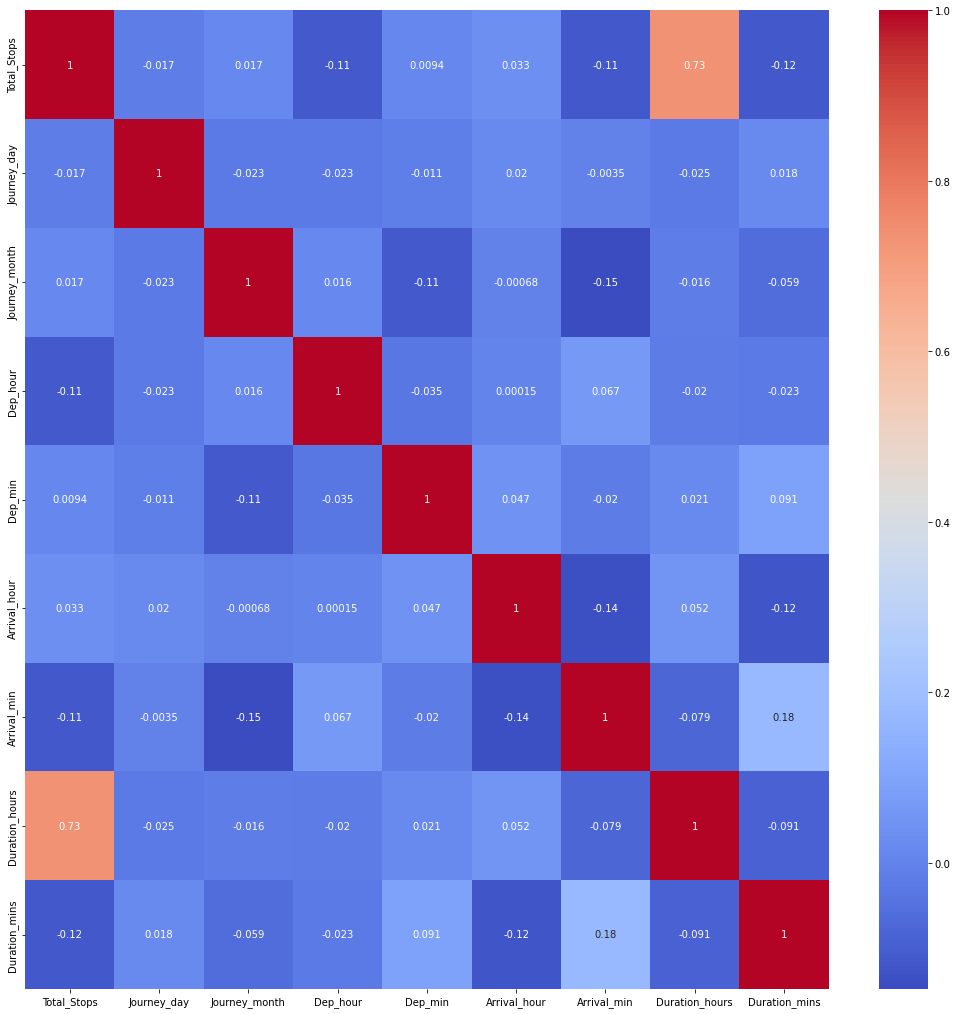

In [106]:
# Corelation between Independent(X) and dependent attributes(y)

plt.figure(figsize = (18, 18))

sns.heatmap(df_test.corr(), annot = True, cmap = 'coolwarm')

plt.show()

In [107]:
selection = ExtraTreesRegressor()

In [108]:
selection.fit(X, y)

ExtraTreesRegressor()

In [109]:
#ExtraTreesRegressor is used to choose the importan feature for the prediction

print(selection.feature_importances_)

[2.19593880e-01 1.44703382e-01 5.27307107e-02 2.43873805e-02
 2.13900385e-02 2.78413651e-02 1.93154029e-02 1.25285569e-01
 1.69112691e-02 8.92933961e-03 1.84526381e-03 1.72027955e-02
 1.42695406e-01 6.81258585e-02 2.03679056e-02 8.31468122e-04
 2.96139083e-03 8.87695489e-05 5.00308322e-03 8.74122626e-05
 4.61104507e-04 7.96753984e-03 3.35360807e-03 8.95342883e-03
 1.04935626e-02 1.79650694e-02 5.31006589e-03 4.90626003e-04
 2.47073036e-02]


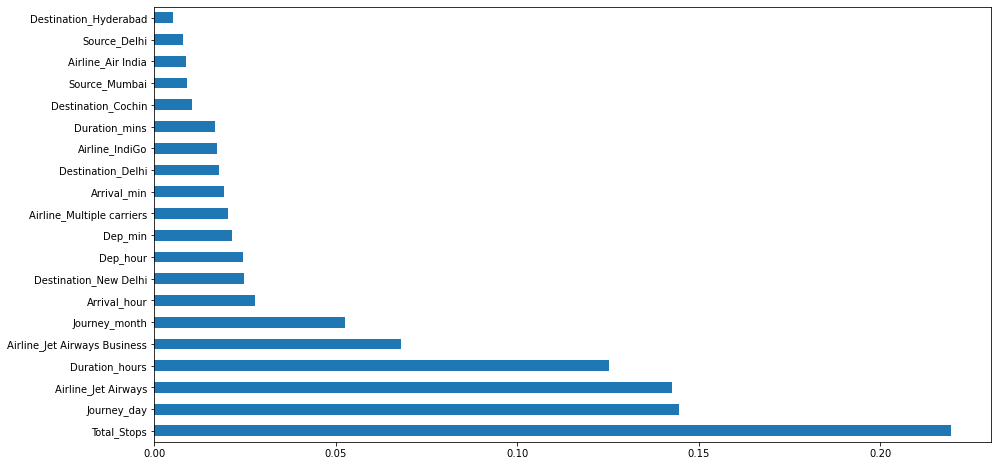

In [112]:
# Plot graphs for important features

plt.figure(figsize =(15, 8))

feat_importances = pd.Series(selection.feature_importances_, index = X.columns)

feat_importances.nlargest(20).plot(kind = "barh")

plt.show()

# Fitting model using Random Forest
Split dataset into train and test set in order to prediction w.r.t X_test,

Do scaling of data

Scaling is not done in Random forest

Fit the data

Predict w.r.t X_test

In regression check RSME Score


In [113]:
# Split train and test data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [114]:
reg_rf = RandomForestRegressor()

reg_rf.fit(X_train, y_train)

RandomForestRegressor()

In [115]:
y_pred = reg_rf.predict(X_test)

In [116]:
reg_rf.score(X_train, y_train)


0.9522137477797945

In [117]:
reg_rf.score(X_test,y_test)


0.7968496666429257

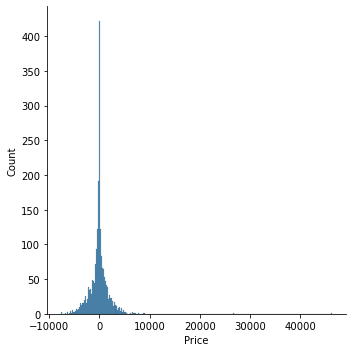

In [118]:
sns.displot(y_test-y_pred)
plt.show()

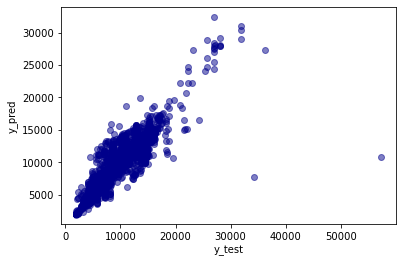

In [119]:
plt.scatter(y_test, y_pred, alpha = 0.5, color = "DarkBlue")

plt.xlabel("y_test")

plt.ylabel("y_pred")

plt.show()

In [120]:
print("MAE:" , metrics.mean_absolute_error(y_test, y_pred))

print("MSE:" , metrics.mean_squared_error(y_test, y_pred))

print("RMSE:" , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1173.9471047404995
MSE: 4380338.93011748
RMSE: 2092.9259256164514


In [121]:
metrics.r2_score(y_test, y_pred)

0.7968496666429257

# Hyperparameter Tuning

following method for hyperparameter tuning

RandomizedSearchCV --> Fast

GridSearchCV

Assign hyperparameters in form of dictionery

Fit the model

Check best paramters and best score

In [123]:
#Randomized Search CV

# Number of trees in random forest

n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]

# Number of features to consider at every split

max_features = ['auto', 'sqrt']

# Maximum number of levels in tree

max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]

# Minimum number of samples required to split a node

min_samples_split = [2, 5, 10, 15, 100]

# Minimum number of samples required at each leaf node

min_samples_leaf = [1, 2, 5, 10]

In [124]:
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [125]:
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = reg_rf, param_distributions = random_grid, scoring = 'neg_mean_squared_error', n_iter = 10, cv = 5, verbose = 2, random_state = 42, n_jobs = 1)
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  17.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  16.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  14.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  13.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  14.0s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=  30.0s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=  28.9s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [126]:
rf_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [127]:
prediction = rf_random.predict(X_test)

<Figure size 576x576 with 0 Axes>

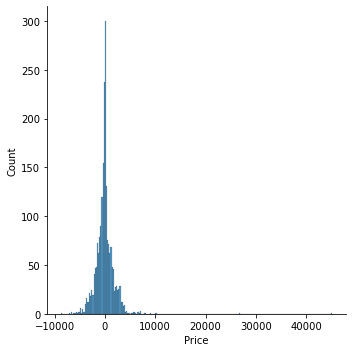

In [131]:
plt.figure(figsize =(8,8))

sns.displot(y_test-prediction)

plt.show()

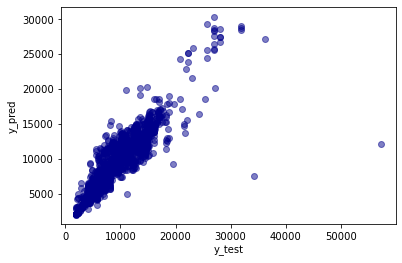

In [132]:
plt.scatter(y_test, prediction, alpha = 0.5, color = "DarkBlue")

plt.xlabel("y_test")

plt.ylabel("y_pred")

plt.show()

In [133]:
print("MAE:" , metrics.mean_absolute_error(y_test, prediction))

print("MSE:" , metrics.mean_squared_error(y_test, prediction))

print("RMSE:" , np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 1165.191547385075
MSE: 4051492.963110163
RMSE: 2012.8320752388072


# Save the model

In [134]:
import pickle

# open a file, where you want to store the data

file = open('flight_price_pred.pkl', 'wb')

# dump information to that file

pickle.dump(rf_random, file)

In [136]:
model = open('flight_price_pred.pkl','rb')

forest = pickle.load(model)

In [137]:
y_prediction = forest.predict(X_test)

In [138]:
metrics.r2_score(y_test, y_prediction)

0.8121008079099495